In [1]:
# ライブラリーのインポート
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ボストンの住宅価格データ
from sklearn.datasets import load_boston

# 評価指標
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# データセットの読込み
boston = load_boston()

# 説明変数の格納
X = pd.DataFrame(boston.data, columns = boston.feature_names)
# 目的変数の追加
y = pd.DataFrame(boston.target)

In [3]:
# 学習データと評価データの分割
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=10
                                                   )

In [4]:
# TPOTRegressorの設定
tpot = TPOTRegressor(scoring='neg_mean_absolute_error',
                     generations=5,
                     population_size=25,
                     random_state=42,
                     verbosity=2,
                     n_jobs=-1
                    )

In [5]:
%%time
tpot.fit(X_train, y_train)

/tmp/Python/python-3.8.6/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -2.34653601349894

Generation 2 - Current best internal CV score: -2.34653601349894

Generation 3 - Current best internal CV score: -2.34653601349894

Generation 4 - Current best internal CV score: -2.34653601349894

Generation 5 - Current best internal CV score: -2.27249269819677

Best pipeline: RandomForestRegressor(RobustScaler(input_matrix), bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=1, min_samples_split=9, n_estimators=100)
CPU times: user 3min 30s, sys: 1.08 s, total: 3min 31s
Wall time: 3min 36s


TPOTRegressor(generations=5, n_jobs=-1, population_size=25, random_state=42,
              scoring='neg_mean_absolute_error', verbosity=2)

In [6]:
tpot.fitted_pipeline_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=0.7500000000000001,
                                       min_samples_split=9, random_state=42))])

In [7]:
y_pred = tpot.predict(X_test)

Text(0, 0.5, 'y_test')

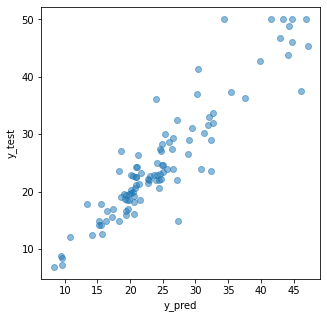

In [8]:
plt.figure(figsize=(5, 5))
plt.scatter(y_pred,y_test,alpha=0.5)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [9]:
# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred))},
                           index = ['scores'])
    return scores

scores = calculate_scores(y_test, y_pred)
print(scores)

              R2       MAE        MSE      RMSE
scores  0.848905  2.728567  15.801663  3.975131
